In [1]:
#loading the data 
import pandas as pd
import yfinance as yf

tickers = ["AAPL", "TSLA", "JPM", "XOM", "JNJ", "SPY", "NVDA", "CAT"]
start_date = "2023-01-01"
end_date = "2024-01-01"

data_all={}

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data_all[ticker] = data



C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\933510313.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\933510313.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\933510313.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\933510313.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start

In [4]:
log_returns_all = {}
for ticker in tickers:
    df = yf.download(ticker, start=start_date, end=end_date)
    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(inplace=True)
    log_returns_all[ticker] = df

C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\3546114806.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\3546114806.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\3546114806.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\3546114806.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\3546114806.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_

In [5]:
import numpy as np

volatility_all = {}

for ticker, df in log_returns_all.items():
    daily_std = df["LogReturn"].std()
    annualized_vol = daily_std * np.sqrt(252) 
    volatility_all[ticker] = annualized_vol
    print(f"{ticker}: Annualized Volatility = {annualized_vol:.4f}")


AAPL: Annualized Volatility = 0.1992
TSLA: Annualized Volatility = 0.5239
JPM: Annualized Volatility = 0.2076
XOM: Annualized Volatility = 0.2486
JNJ: Annualized Volatility = 0.1652
SPY: Annualized Volatility = 0.1308
NVDA: Annualized Volatility = 0.4679
CAT: Annualized Volatility = 0.2854


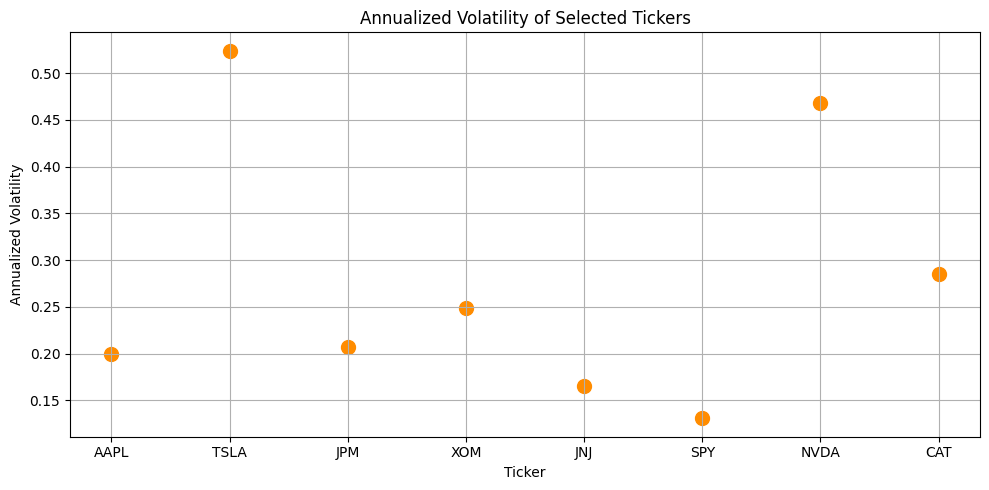

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(volatility_all.keys(), volatility_all.values(), color='darkorange', s=100)
plt.title("Annualized Volatility of Selected Tickers")
plt.xlabel("Ticker")
plt.ylabel("Annualized Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()

# MONTE CARLO

In [33]:
#simulations parameters

ticker = "AAPL"
S0 = float(log_returns_all[ticker]["Close"].iloc[-1])
sigma = volatility_all[ticker]
T_days = 60
T = T_days / 252
r = 0.05
num_simulations = 10000

C:\Users\ashis\AppData\Local\Temp\ipykernel_8112\243337080.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(log_returns_all[ticker]["Close"].iloc[-1])


In [34]:
#force convert s0 to floaat
S0


191.1303253173828

In [35]:
#future price simulation , brownian motion
Z = np.random.standard_normal(num_simulations)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

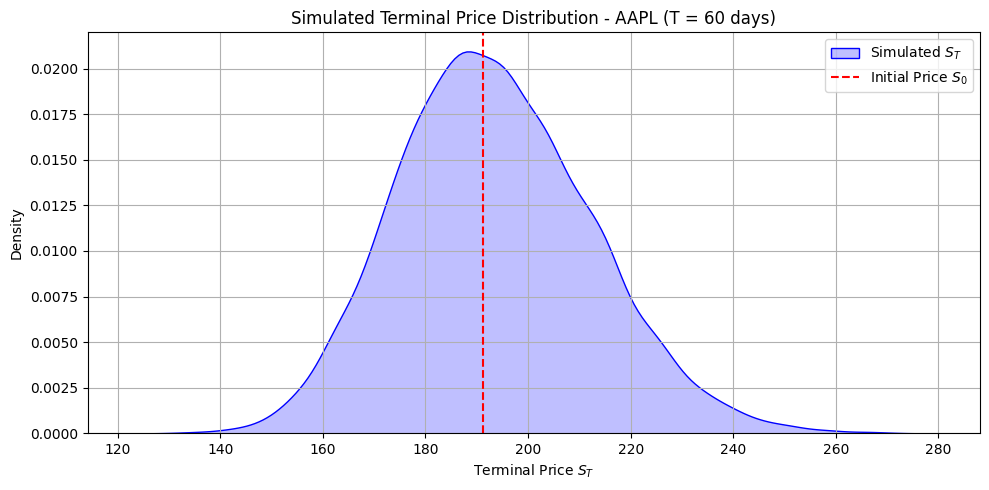

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.kdeplot(ST, fill=True, color='blue', label="Simulated $S_T$")
plt.axvline(S0, color='red', linestyle='--', label="Initial Price $S_0$")
plt.title(f"Simulated Terminal Price Distribution - {ticker} (T = {T_days} days)")
plt.xlabel("Terminal Price $S_T$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

strike_offsets = [-0.025, 0.0, 0.025, 0.05, 0.075]
strike_prices = [round(S0 * (1 + offset), 2) for offset in strike_offsets]


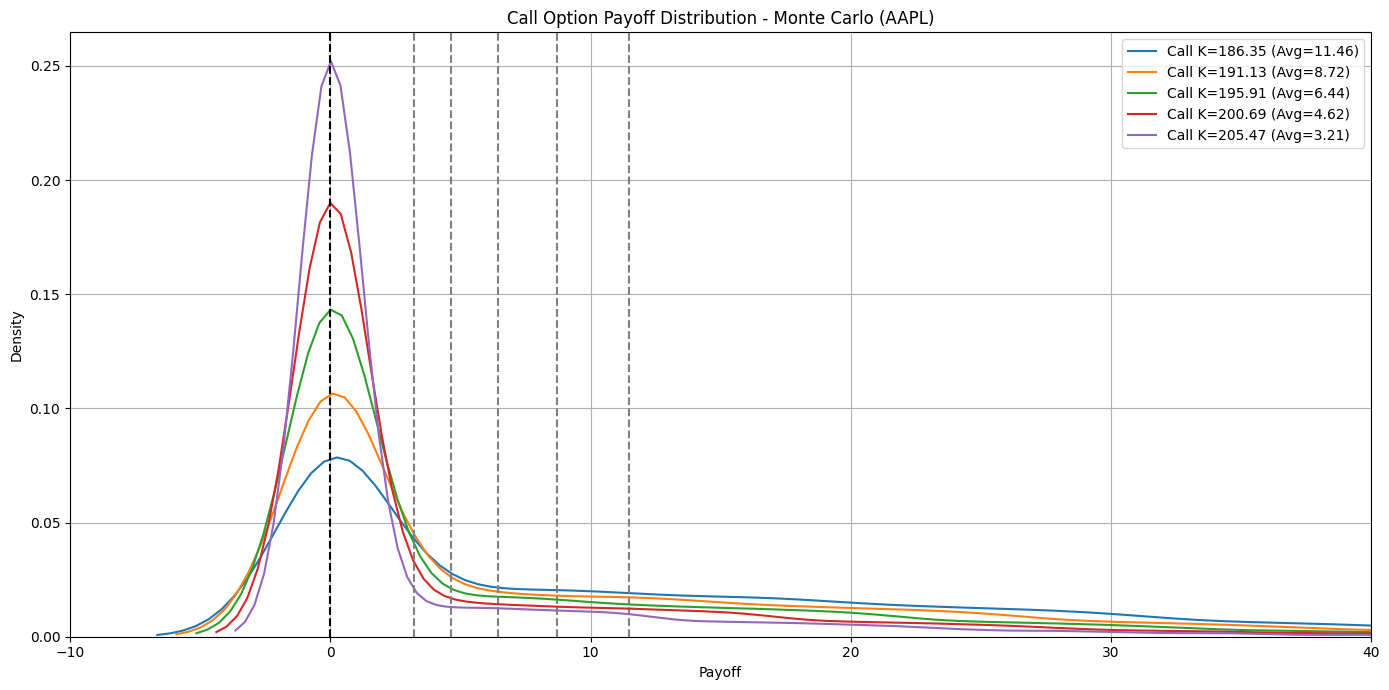

In [38]:
plt.figure(figsize=(14, 7))
for K in strike_prices:
    call_payoffs = np.maximum(ST - K, 0)
    avg_call = np.mean(call_payoffs)
    
    sns.kdeplot(call_payoffs, label=f"Call K={K} (Avg={avg_call:.2f})", fill=False)
    plt.axvline(avg_call, linestyle='--', linewidth=1.5, color='gray')
plt.title(f"Call Option Payoff Distribution - Monte Carlo ({ticker})")
plt.xlabel("Payoff")
plt.xlim(-10,40)
plt.ylabel("Density")
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

discounted_prices = []

for K in strike_prices:
    call_payoffs = np.maximum(ST - K, 0)
    avg_payoff = np.mean(call_payoffs)
    discounted_price = np.exp(-r * T) * avg_payoff
    discounted_prices.append({
        "Strike Price": K,
        "Discounted MC Price": round(discounted_price, 4),
        "Timeframe (Days)": T_days,
        "Ticker": ticker
    })

discounted_df = pd.DataFrame(discounted_prices)
discounted_df


,Strike Price,Discounted MC Price,Timeframe (Days),Ticker
0,186.35,11.3292,60,AAPL
1,191.13,8.6128,60,AAPL
2,195.91,6.3626,60,AAPL
3,200.69,4.5682,60,AAPL
4,205.47,3.1741,60,AAPL


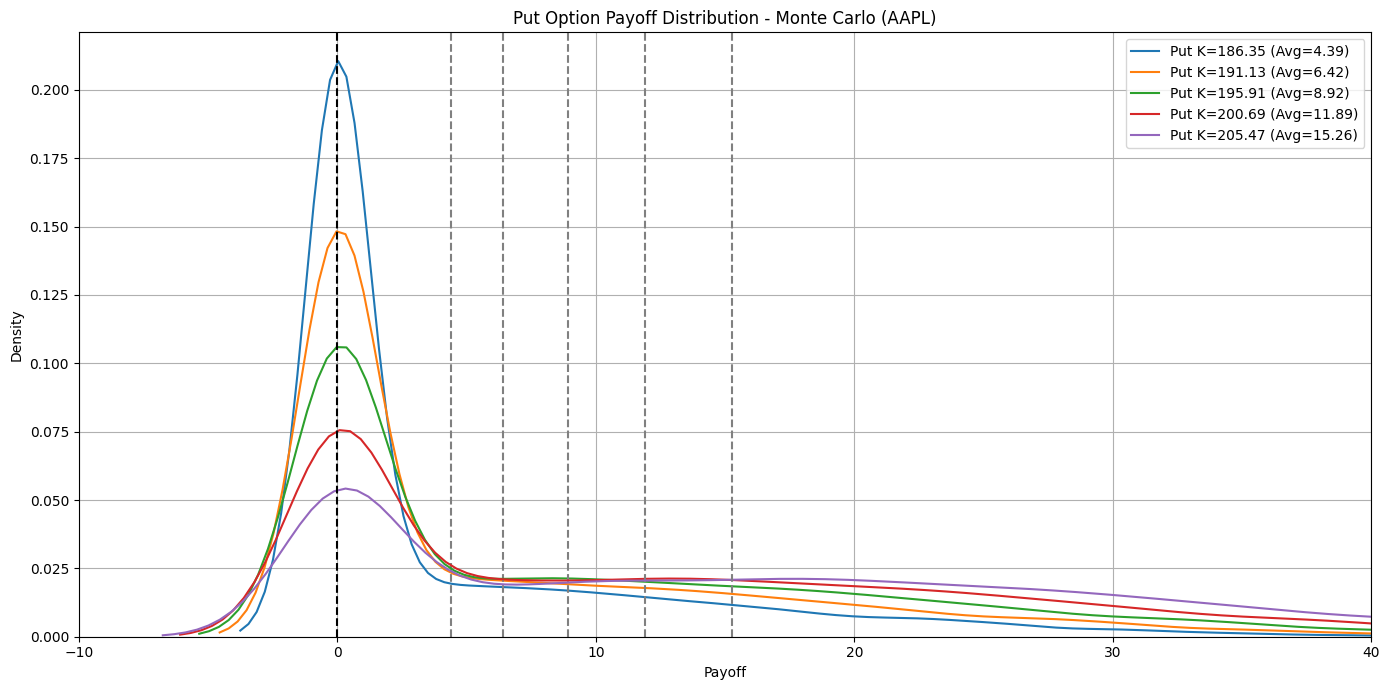

In [40]:
plt.figure(figsize=(14, 7))

for K in strike_prices:
    put_payoffs = np.maximum(K - ST, 0)
    avg_put = np.mean(put_payoffs)

    sns.kdeplot(put_payoffs, label=f"Put K={K} (Avg={avg_put:.2f})", fill=False)
    plt.axvline(avg_put, linestyle='--', linewidth=1.5, color='gray')

plt.title(f"Put Option Payoff Distribution - Monte Carlo ({ticker})")
plt.xlabel("Payoff")
plt.xlim(-10, 40)
plt.ylabel("Density")
plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

discounted_put_prices = []

for K in strike_prices:
    put_payoffs = np.maximum(K - ST, 0)
    avg_payoff = np.mean(put_payoffs)
    discounted_price = np.exp(-r * T) * avg_payoff
    discounted_put_prices.append({
        "Strike Price": K,
        "Discounted MC Put Price": round(discounted_price, 4),
        "Timeframe (Days)": T_days,
        "Ticker": ticker
    })

discounted_put_df = pd.DataFrame(discounted_put_prices)
discounted_put_df


,Strike Price,Discounted MC Put Price,Timeframe (Days),Ticker
0,186.35,4.3368,60,AAPL
1,191.13,6.3438,60,AAPL
2,195.91,8.8171,60,AAPL
3,200.69,11.7461,60,AAPL
4,205.47,15.0755,60,AAPL


In [ ]:
#define a fuction for all this


import numpy as np
import pandas as pd

def monte_carlo_option_pricing(S0, sigma, r, strike_prices, timeframes_days, ticker, option_type='call', num_simulations=10000):
    results = []

    for T_days in timeframes_days:
        T = T_days / 252  
        Z = np.random.standard_normal(num_simulations)
        ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

        for K in strike_prices:
            if option_type == 'call':
                payoffs = np.maximum(ST - K, 0)
            elif option_type == 'put':
                payoffs = np.maximum(K - ST, 0)
            else:
                raise ValueError("option_type must be 'call' or 'put'")

            avg_payoff = np.mean(payoffs)
            discounted_price = np.exp(-r * T) * avg_payoff

            results.append({
                "Ticker": ticker,
                "Option Type": option_type,
                "Strike Price": K,
                "Discounted MC Price": round(discounted_price, 4),
                "Timeframe (Days)": T_days
            })

    return pd.DataFrame(results)


In [ ]:
def monte_carlo_option_pricing_single_timeframe(S0, sigma, r, strike_prices, T_days, ticker, option_type='call', num_simulations=10000):
    results = []
    T = T_days / 252  
    Z = np.random.standard_normal(num_simulations)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    for K in strike_prices:
        if option_type == 'call':
            payoffs = np.maximum(ST - K, 0)
        elif option_type == 'put':
            payoffs = np.maximum(K - ST, 0)
        else:
            raise ValueError("option_type must be 'call' or 'put'")

        avg_payoff = np.mean(payoffs)
        discounted_price = np.exp(-r * T) * avg_payoff

        results.append({
            "Ticker": ticker,
            "Option Type": option_type,
            "Strike Price": K,
            "Discounted MC Price": round(discounted_price, 4),
            "Timeframe (Days)": T_days
        })

    return pd.DataFrame(results)


volitility analysis inother notbook for readablilty and segmentation